# Name: Shrook Ehab Attia
# Group No.: 1
# AI - Nasr City Intake 2

## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x_points = np.linspace(0,20)
print(x_points)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [3]:
a = -2
b = 1
y_points = np.add(np.multiply(a, x_points), b)
print(y_points)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def GDBatch(x_points, y_points, learning_rate, maxNumOfIteration):
    m = len(x_points)
    theta = [0,0]
    loss = []
    thetas0 = []
    thetas1 = []
    GDthetas = [0,0]
    hyposesis = []
    iteration = 1
    numIter = []
    for i in range(maxNumOfIteration):
        print('==================iteration{}==================='.format(iteration))
        hThetaX = np.add(theta[0], np.multiply(theta[1], x_points))
        hyposesis.append(hThetaX)
        numIter.append(i)
        #JTheta = (1 / 2 * m) * np.sum(np.power(np.subtract(hThetaX, y_points), 2))
        JTheta = (1 / (2 * m)) * np.sum(np.subtract(hThetaX, y_points) **2)
        loss.append(JTheta)
        GDTheta0 = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), 1))
        GDTheta1 = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), x_points))
        thetas0.append(theta[0])
        thetas1.append(theta[1])
        theta[0] = theta[0] - learning_rate * GDTheta0
        theta[1] = theta[1] - learning_rate * GDTheta1
        GDthetas[0] = GDTheta0
        GDthetas[1] = GDTheta1
        print('error using MSE = ', JTheta)
        print('New Theta = ', theta)
        print('')
        iteration = iteration + 1
        #norm = L2Norm(gradTheta)
        #norm = np.absolute(np.dot(GDTheta0, GDTheta1))
        norm = np.linalg.norm(GDthetas)
        if i > 0:
            if norm < 0.001:
                break
            if np.absolute(loss[i] - loss[i-1]) < 0.001:
                optimum = hThetaX
                break
#print('loss is: ', loss)
#print('thetas is: ', theta)
    return [thetas0, thetas1, loss, hyposesis, optimum, numIter]

#### Try your function with any input parameterss of your choice.

In [5]:
learning_rate = 0.001
maxNumOfIteration = 1000
thetas0, thetas1, loss, hyposesis, optimum, numIter = GDBatch(x_points, y_points, learning_rate, maxNumOfIteration)

print('thetas0: ', thetas0)
print('thetas1: ', thetas1)
print('loss: ', loss)
print('hyposesis: ', hyposesis)
print('optimum: ', optimum)

==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.019, -0.2593877551020409]

==================iteration2===================
error using MSE =  186.82544901821942
New Theta =  [-0.0353871224489796, -0.48364756768013334]

==================iteration3===================
error using MSE =  139.68837516021625
New Theta =  [-0.04951525964972929, -0.6775370852987277]

==================iteration4===================
error using MSE =  104.45490187382671
New Theta =  [-0.06169037353709228, -0.8451695906007691]

==================iteration5===================
error using MSE =  78.11898842228952
New Theta =  [-0.0721769872575475, -0.9901012726212131]

==================iteration6===================
error using MSE =  58.43371572199665
New Theta =  [-0.08120379754407782, -1.1154066782731273]

==================iteration7===================
error using MSE =  43.719583789283334
New Theta =  [-0.08896852696380247, -1.2237439448568164]

=========

#### Calculate r2 score

In [6]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.9975950054190024

#### Plot loss vs. epochs

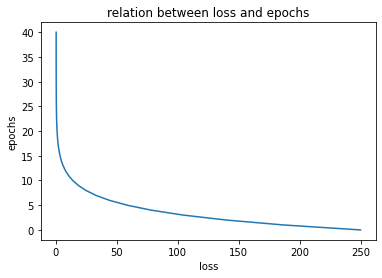

In [7]:
plt.plot(loss, numIter)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

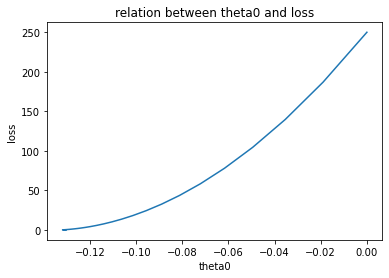

In [9]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

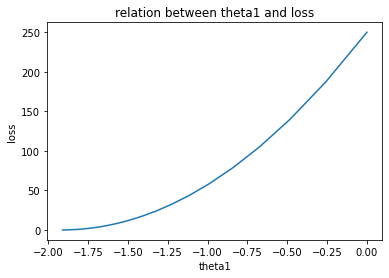

In [10]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

#### Plot all regression lines till converge

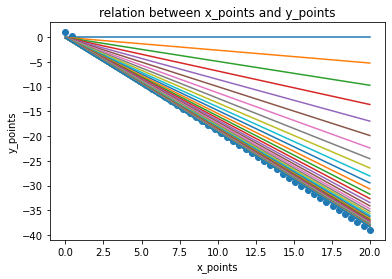

In [11]:
plt.scatter(x_points, y_points)
for i in hyposesis:
    z = np.polyfit(x_points, i, 1)
    p = np.poly1d(z)
    plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

#### Plot the best regression line

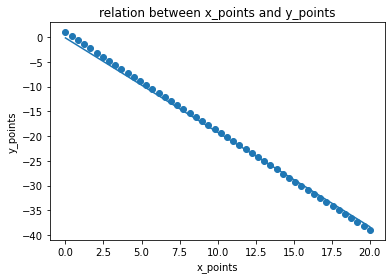

In [12]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [13]:
learning_rate = 0.01
maxNumOfIteration = 1000
thetas0, thetas1, loss, hyposesis, optimum, numIter = GDBatch(x_points, y_points, learning_rate, maxNumOfIteration)

print('thetas0: ', thetas0)
print('thetas1: ', thetas1)
print('loss: ', loss)
print('hyposesis: ', hyposesis)
print('optimum', optimum)

==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.19, -2.5938775510204084]

==================iteration2===================
error using MSE =  31.527821438771273
New Theta =  [-0.11871224489795916, -1.674960849645981]

==================iteration3===================
error using MSE =  4.104740105830771
New Theta =  [-0.14002903748438147, -2.0008974603269047]

==================iteration4===================
error using MSE =  0.6601186550646155
New Theta =  [-0.12853900107684718, -1.8856857324646765]

==================iteration5===================
error using MSE =  0.22679212340255056
New Theta =  [-0.12868503781961105, -1.9268061518943662]

==================iteration6===================
error using MSE =  0.1716373537320427
New Theta =  [-0.12471757225197833, -1.9125252802546875]

==================iteration7===================
error using MSE =  0.16397836159451523
New Theta =  [-0.12221786850398979, -1.917876614931339]

========

In [14]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.9976746549092759

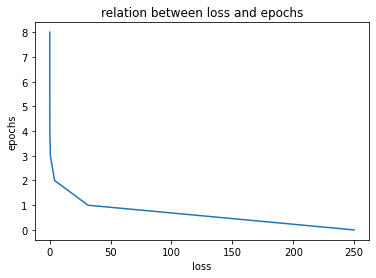

In [15]:
plt.plot(loss, numIter)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

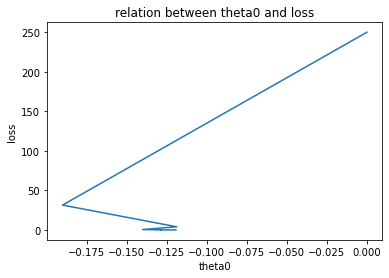

In [16]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

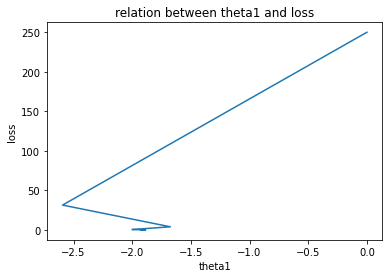

In [17]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

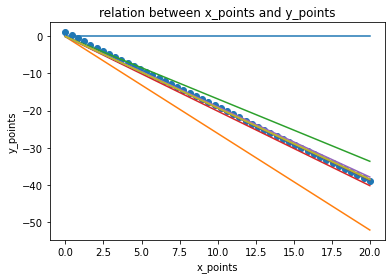

In [18]:
plt.scatter(x_points, y_points)
for i in hyposesis:
    z = np.polyfit(x_points, i, 1)
    p = np.poly1d(z)
    plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

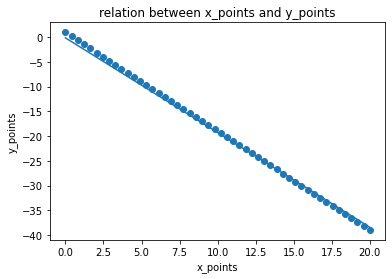

In [19]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

#### without shuffling x_points and y_points

In [20]:
def GDMiniBatch(x_points, y_points, learning_rate, maxNumOfIteration):
    m = len(x_points)
    noOfUpdates = 6
    batch = int(m / noOfUpdates)
    batchesLeft = m - batch
    index = noOfUpdates
    start = 0
    theta = [0,0]
    loss = []
    thetas0 = []
    thetas1 = []
    GDthetas = [0,0]   
    hyposesis = []
    iteration = 1
    numIter = []
    if m % batch != 0:
        index = noOfUpdates + 1
    for i in range(maxNumOfIteration - 1):
        count = 0
        start = 0
        batch = int(m / noOfUpdates)
        batchesLeft = m - batch
        for j in range(index):
            if j == (noOfUpdates):
                batch = batchesLeft
            count = j
            end = start + batch
            print('==================iteration{}==================='.format(iteration))
            print('j = ', j)
            print('noOfUpdates = ', noOfUpdates)
            print('start = ', start)
            print('end = ', end)
            print('batch = ', batch)
            print('batches left = ', batchesLeft)
            hThetaX = np.add(theta[0], np.multiply(theta[1], x_points[int(start):int(end)]))
            hyposesis.append(hThetaX)
            numIter.append(i)
            #JTheta = (1 / 2 * m) * np.sum(np.power(np.subtract(hThetaX, y_points), 2))
            JTheta = (1 / 2) * np.sum(np.subtract(hThetaX, y_points[int(start):int(end)]) **2)
            loss.append(JTheta)
            GDTheta0 = np.sum(np.multiply(np.subtract(hThetaX, y_points[int(start):int(end)]), 1))
            GDTheta1 = np.sum(np.multiply(np.subtract(hThetaX, y_points[int(start):int(end)]), x_points[int(start):int(end)]))
            GDthetas[0] = GDTheta0
            GDthetas[1] = GDTheta1
            thetas0.append(theta[0])
            thetas1.append(theta[1])
            optimum = np.add(theta[0], np.multiply(theta[1], x_points))
            theta[0] = theta[0] - learning_rate * GDTheta0
            theta[1] = theta[1] - learning_rate * GDTheta1
            print('error using MSE = ', JTheta)
            print('New Theta = ', theta)
            print('')
            iteration = iteration + 1
            #norm = np.linalg.norm(GDthetas)
            if i > 0:
                #if norm < 0.001:
                    #break
                if np.absolute(loss[i] - loss[int(i-index)]) < 1:
                    break
            start = start + batch
            if j != (noOfUpdates - 1):
                batchesLeft = batchesLeft - batch
        
#print('loss is: ', loss)
#print('thetas is: ', theta)
    return [thetas0, thetas1, loss, hyposesis, optimum, numIter]

In [21]:
learning_rate = 0.001
maxNumOfIteration = 100
thetas0, thetas1, loss, hyposesis, optimum, numIter = GDMiniBatch(x_points, y_points, learning_rate, maxNumOfIteration)

print('thetas0: ', thetas0)
print('')
print('thetas1: ', thetas1)
print('')
print('loss: ', loss)
print('')
print('hyposesis: ', hyposesis)
print('')
print('optimum', optimum)

==================iteration1===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
error using MSE =  27.79008746355685
New Theta =  [-0.014857142857142857, -0.03521865889212829]

==================iteration2===================
j =  1
noOfUpdates =  6
start =  8
end =  16
batch =  8
batches left =  34
error using MSE =  282.9635170179575
New Theta =  [-0.08051782995180581, -0.3571696251926129]

==================iteration3===================
j =  2
noOfUpdates =  6
start =  16
end =  24
batch =  8
batches left =  26
error using MSE =  584.9690869618751
New Theta =  [-0.17647839689176376, -1.1324324259087148]

==================iteration4===================
j =  3
noOfUpdates =  6
start =  24
end =  32
batch =  8
batches left =  18
error using MSE =  295.8321003705157
New Theta =  [-0.2449705967778879, -1.9072928682976276]

==================iteration5===================
j =  4
noOfUpdates =  6
start =  32
end =  40
batch =  8
batches left =  10
er

noOfUpdates =  6
start =  24
end =  32
batch =  8
batches left =  18
error using MSE =  0.19189155450034465
New Theta =  [0.036368766007746224, -1.9151502327245828]

==================iteration110===================
j =  4
noOfUpdates =  6
start =  32
end =  40
batch =  8
batches left =  10
error using MSE =  0.30783851976772997
New Theta =  [0.034242169387350176, -1.9465578847503244]

==================iteration111===================
j =  5
noOfUpdates =  6
start =  40
end =  48
batch =  8
batches left =  2
error using MSE =  0.011132812518593738
New Theta =  [0.03437727035597095, -1.9445330922654809]

==================iteration112===================
j =  6
noOfUpdates =  6
start =  48
end =  50
batch =  2
batches left =  2
error using MSE =  0.01765674495146928
New Theta =  [0.03411247906005561, -1.949779499460984]

==================iteration113===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
error using MSE =  3.2067972731147787
New The

New Theta =  [0.2567435141236581, -1.961355073862]

==================iteration220===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
error using MSE =  1.8988730036192742
New Theta =  [0.26224790971194883, -1.953762053408556]

==================iteration221===================
j =  1
noOfUpdates =  6
start =  8
end =  16
batch =  8
batches left =  34
error using MSE =  1.0920637718442021
New Theta =  [0.2664136443581664, -1.9345321358907988]

==================iteration222===================
j =  2
noOfUpdates =  6
start =  16
end =  24
batch =  8
batches left =  26
error using MSE =  0.19564641823640141
New Theta =  [0.26811376916206214, -1.9214586144891275]

==================iteration223===================
j =  3
noOfUpdates =  6
start =  24
end =  32
batch =  8
batches left =  18
error using MSE =  0.11122288745414949
New Theta =  [0.266916163166973, -1.9354506914754812]

==================iteration224===================
j =  4
noOfUpdates 

j =  1
noOfUpdates =  6
start =  8
end =  16
batch =  8
batches left =  34
error using MSE =  0.37262707739936085
New Theta =  [0.4185701370784811, -1.9286773896065241]

==================iteration327===================
j =  2
noOfUpdates =  6
start =  16
end =  24
batch =  8
batches left =  26
error using MSE =  0.01855414845778409
New Theta =  [0.4186802179323095, -1.9283002862070864]

==================iteration328===================
j =  3
noOfUpdates =  6
start =  24
end =  32
batch =  8
batches left =  18
error using MSE =  0.21774606803931032
New Theta =  [0.41689243454214037, -1.9488689315868355]

==================iteration329===================
j =  4
noOfUpdates =  6
start =  32
end =  40
batch =  8
batches left =  10
error using MSE =  0.10871352262820275
New Theta =  [0.41563026509464457, -1.9675152777041698]

==================iteration330===================
j =  5
noOfUpdates =  6
start =  40
end =  48
batch =  8
batches left =  2
error using MSE =  0.003922912550716
New

In [22]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.999289268190231

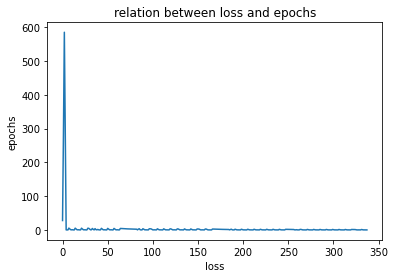

In [25]:
plt.plot(loss)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

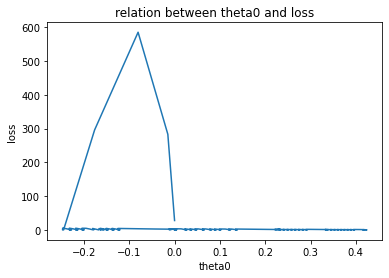

In [26]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

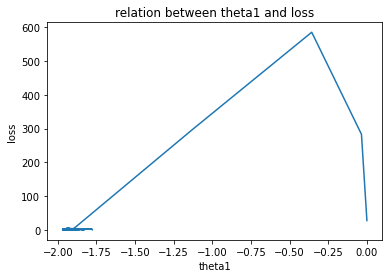

In [27]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

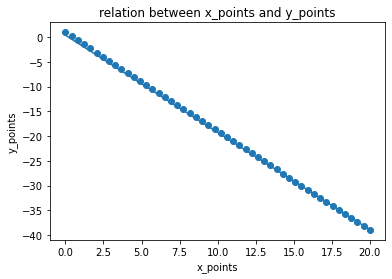

In [30]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

#### After Shuffeling x_points and y_points

In [31]:
import random
random.shuffle(x_points)
print(x_points)
print('')
a = -2
b = 1
y_points = np.add(np.multiply(a, x_points), b)
print(y_points)

[10.20408163  3.26530612  5.30612245  0.40816327  6.53061224  1.63265306
  4.08163265 19.18367347 11.83673469 15.51020408 10.6122449   7.75510204
 12.24489796  7.34693878  4.48979592  9.3877551  18.36734694  0.81632653
  4.89795918 12.65306122  0.         15.10204082  2.44897959 19.59183673
 11.02040816 14.69387755 17.14285714  6.93877551  8.57142857  2.85714286
  1.2244898  16.32653061  8.97959184  2.04081633  3.67346939 11.42857143
 18.7755102  20.         14.28571429 13.06122449 13.87755102 16.73469388
 17.95918367 13.46938776 15.91836735  8.16326531  6.12244898  5.71428571
 17.55102041  9.79591837]

[-19.40816327  -5.53061224  -9.6122449    0.18367347 -12.06122449
  -2.26530612  -7.16326531 -37.36734694 -22.67346939 -30.02040816
 -20.2244898  -14.51020408 -23.48979592 -13.69387755  -7.97959184
 -17.7755102  -35.73469388  -0.63265306  -8.79591837 -24.30612245
   1.         -29.20408163  -3.89795918 -38.18367347 -21.04081633
 -28.3877551  -33.28571429 -12.87755102 -16.14285714  -4.71

In [32]:
m = len(x_points)
m

50

In [33]:
learning_rate = 0.001
maxNumOfIteration = 100
thetas0, thetas1, loss, hyposesis, optimum, numIter = GDMiniBatch(x_points, y_points, learning_rate, maxNumOfIteration)

print('thetas0: ', thetas0)
print('')
print('thetas1: ', thetas1)
print('')
print('loss: ', loss)
print('')
print('hyposesis: ', hyposesis)
print('')
print('optimum', optimum)

==================iteration1===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
error using MSE =  1048.9645980841317
New Theta =  [-0.09322448979591838, -1.095576842982091]

==================iteration2===================
j =  1
noOfUpdates =  6
start =  8
end =  16
batch =  8
batches left =  34
error using MSE =  280.5270522228929
New Theta =  [-0.15609424182100995, -1.7919155558292472]

==================iteration3===================
j =  2
noOfUpdates =  6
start =  16
end =  24
batch =  8
batches left =  26
error using MSE =  12.254894179501127
New Theta =  [-0.16221825702721993, -1.9437276107938346]

==================iteration4===================
j =  3
noOfUpdates =  6
start =  24
end =  32
batch =  8
batches left =  18
error using MSE =  1.880342961522495
New Theta =  [-0.15735339714112048, -1.910081570859001]

==================iteration5===================
j =  4
noOfUpdates =  6
start =  32
end =  40
batch =  8
batches left =  10
err

batch =  2
batches left =  2
error using MSE =  0.07030430301044174
New Theta =  [0.08129035679412597, -1.9341859096911886]

==================iteration115===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
error using MSE =  1.5570667908605644
New Theta =  [0.08530903508332699, -1.9254056483094921]

==================iteration116===================
j =  1
noOfUpdates =  6
start =  8
end =  16
batch =  8
batches left =  34
error using MSE =  0.3522203939439373
New Theta =  [0.08671990801573852, -1.917548861263925]

==================iteration117===================
j =  2
noOfUpdates =  6
start =  16
end =  24
batch =  8
batches left =  26
error using MSE =  1.6483232510917973
New Theta =  [0.0879348605429475, -1.94407432325152]

==================iteration118===================
j =  3
noOfUpdates =  6
start =  24
end =  32
batch =  8
batches left =  18
error using MSE =  0.9185844819699908
New Theta =  [0.09082580793923387, -1.929777430970486]



==================iteration216===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
error using MSE =  0.9013768786238711
New Theta =  [0.28791385397999575, -1.9367315547403667]

==================iteration217===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
error using MSE =  0.8950733118619727
New Theta =  [0.2904083851023621, -1.9369500771114223]

==================iteration218===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
error using MSE =  0.8888138589858006
New Theta =  [0.29289401988350905, -1.937169619323968]

==================iteration219===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
error using MSE =  0.8825981854972424
New Theta =  [0.29537088111063364, -1.9373891466486095]

==================iteration220===================
j =  0
noOfUpdates =  6
start =  0
end =  8
batch =  8
batches left =  42
e

In [34]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.999224767942702

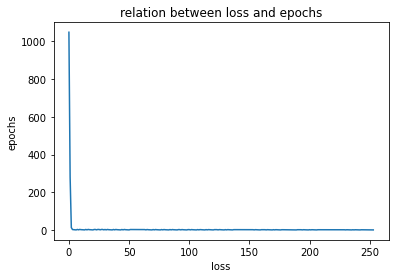

In [35]:
plt.plot(loss)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

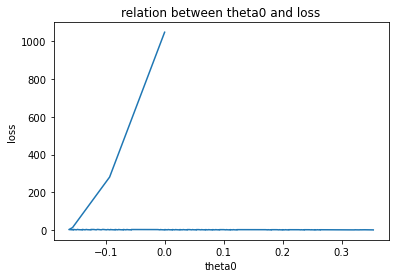

In [36]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

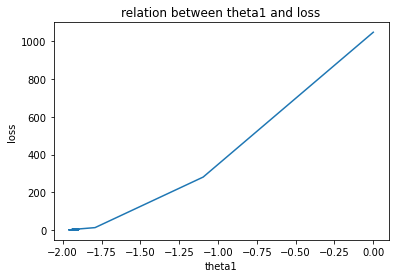

In [37]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

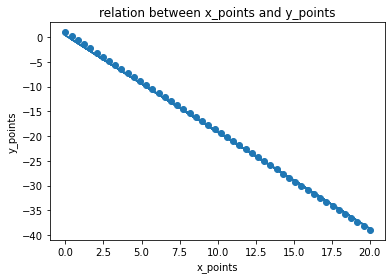

In [38]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

#### without shuffling x_points and y_points

In [39]:
x_points = np.linspace(0,20)
print(x_points)
a = -2
b = 1
y_points = np.add(np.multiply(a, x_points), b)
print(y_points)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.6734

In [40]:
def GDStocastic(x_points, y_points, learning_rate, maxNumOfIteration):
    m = len(x_points)
    theta = [0,0]
    loss = []
    thetas0 = []
    thetas1 = []
    GDthetas = [0,0]   
    hyposesis = []
    iteration = 1
    numIter = []
    #thetas0.append(theta[0])
    #thetas1.append(theta[1])
    for i in range(maxNumOfIteration):
        count = 0
        for j in range(m):
            count = j
            print('==================iteration{}==================='.format(iteration))
            hThetaX = np.add(theta[0], np.multiply(theta[1], x_points[j]))
            hyposesis.append(hThetaX)
            numIter.append(i)
            #JTheta = (1 / 2 * m) * np.sum(np.power(np.subtract(hThetaX, y_points), 2))
            JTheta = (1 / 2) * np.sum(np.subtract(hThetaX, y_points[j]) **2)
            loss.append(JTheta)
            GDTheta0 = np.sum(np.multiply(np.subtract(hThetaX, y_points[j]), 1))
            GDTheta1 = np.sum(np.multiply(np.subtract(hThetaX, y_points[j]), x_points[j]))
            GDthetas[0] = GDTheta0
            GDthetas[1] = GDTheta1
            thetas0.append(theta[0])
            thetas1.append(theta[1])
            theta[0] = theta[0] - learning_rate * GDTheta0
            theta[1] = theta[1] - learning_rate * GDTheta1
            print('error using MSE = ', JTheta)
            print('New Theta = ', theta)
            print('')
            iteration = iteration + 1
            #norm = np.linalg.norm(GDthetas)
            if i > 0:
                #if norm < 0.001:
                    #break
                if np.absolute(loss[i] - loss[i-m]) < 0.001:
                    optimum = np.add(theta[0], np.multiply(theta[1], x_points))
                    break
#print('loss is: ', loss)
#print('thetas is: ', theta)
    return [thetas0, thetas1, loss, hyposesis, optimum, numIter]

In [41]:
learning_rate = 0.001
maxNumOfIteration = 100
thetas0, thetas1, loss, hyposesis, optimum, numIter = GDStocastic(x_points, y_points, learning_rate, maxNumOfIteration)

print('thetas0: ', thetas0)
print('')
print('thetas1: ', thetas1)
print('')
print('loss: ', loss)
print('')
print('hyposesis: ', hyposesis)
print('')
print('optimum: ', optimum)

==================iteration1===================
error using MSE =  0.5
New Theta =  [0.001, 0.0]

==================iteration2===================
error using MSE =  0.016684798209079546
New Theta =  [0.0011826734693877552, 7.456059975010413e-05]

==================iteration3===================
error using MSE =  0.20091245005613068
New Theta =  [0.0005487768688981632, -0.0004429060128944607]

==================iteration4===================
error using MSE =  1.0497802645405254
New Theta =  [-0.0009002091659141296, -0.0022171746269503295]

==================iteration5===================
error using MSE =  2.5555767510574636
New Theta =  [-0.0031609952022552353, -0.005908253869956217]

==================iteration6===================
error using MSE =  4.701447400191733
New Theta =  [-0.0062274091991551105, -0.012166241618731472]

==================iteration7===================
error using MSE =  7.457278298362122
New Theta =  [-0.010089346096195797, -0.0216240462645454]

================

New Theta =  [-0.16602656009327393, -1.938811556079988]

==================iteration303===================
error using MSE =  0.6228137228590939
New Theta =  [-0.16491048328331945, -1.937900472969821]

==================iteration304===================
error using MSE =  0.5928192064247578
New Theta =  [-0.16382161303721593, -1.936567162464388]

==================iteration305===================
error using MSE =  0.5620732976812531
New Theta =  [-0.1627613552405634, -1.9348361293269962]

==================iteration306===================
error using MSE =  0.5302171055620322
New Theta =  [-0.16173158137649224, -1.9327345500125652]

==================iteration307===================
error using MSE =  0.4970043675201945
New Theta =  [-0.1607345815093707, -1.9302929176849206]

==================iteration308===================
error using MSE =  0.46230986440247207
New Theta =  [-0.15977301002019012, -1.927545570572976]

==================iteration309===================
error using MSE =  0.

New Theta =  [-0.0924077397620776, -1.9432241326235598]

==================iteration601===================
error using MSE =  0.5966773349460455
New Theta =  [-0.09131533202231552, -1.9432241326235598]

==================iteration602===================
error using MSE =  0.5704631412007313
New Theta =  [-0.09024719051371216, -1.9427881564975993]

==================iteration603===================
error using MSE =  0.5444916692985906
New Theta =  [-0.08920364686891469, -1.9419362841344994]

==================iteration604===================
error using MSE =  0.5182691187610672
New Theta =  [-0.08818554164963618, -1.9406896246823215]

==================iteration605===================
error using MSE =  0.49138966739155965
New Theta =  [-0.08719418937381133, -1.9390710903544441]

==================iteration606===================
error using MSE =  0.4635395565351947
New Theta =  [-0.08623133989799989, -1.9371060914242166]

==================iteration607===================
error using MSE 

New Theta =  [-0.009141014701189824, -1.915673857704046]

==================iteration916===================
error using MSE =  0.1214547558578556
New Theta =  [-0.008648156190341415, -1.912656356617219]

==================iteration917===================
error using MSE =  0.09602745083557505
New Theta =  [-0.008209915501140664, -1.909794376606112]

==================iteration918===================
error using MSE =  0.07307410082059063
New Theta =  [-0.007827622156127726, -1.9071417289060222]

==================iteration919===================
error using MSE =  0.053008848789626875
New Theta =  [-0.007502018566498783, -1.904749539267932]

==================iteration920===================
error using MSE =  0.03613343390224469
New Theta =  [-0.007233193590344242, -1.9026647741467335]

==================iteration921===================
error using MSE =  0.0226121210676552
New Theta =  [-0.007020533669025461, -1.900928774789029]

==================iteration922===================
error usi

New Theta =  [0.05731304462287938, -1.9156567861834486]

==================iteration1218===================
error using MSE =  0.06388465391488797
New Theta =  [0.05767049295177431, -1.913176532472749]

==================iteration1219===================
error using MSE =  0.04634271132074914
New Theta =  [0.05797493575862232, -1.9109398098101922]

==================iteration1220===================
error using MSE =  0.0315894673171391
New Theta =  [0.05822628996016723, -1.9089905323288234]

==================iteration1221===================
error using MSE =  0.01976852964958574
New Theta =  [0.05842512924023827, -1.907367354532325]

==================iteration1222===================
error using MSE =  0.010890041357424109
New Theta =  [0.058572710006989395, -1.9061023765316012]

==================iteration1223===================
error using MSE =  0.00482800086817921
New Theta =  [0.058670974963796786, -1.9052199973276165]

==================iteration1224===================
error usin

New Theta =  [0.11048648537633152, -1.9515180285133185]

==================iteration1505===================
error using MSE =  0.32834107766343784
New Theta =  [0.11129684465179325, -1.950194992961544]

==================iteration1506===================
error using MSE =  0.309731945200059
New Theta =  [0.1120839049356344, -1.9485887474843173]

==================iteration1507===================
error using MSE =  0.2903303720497283
New Theta =  [0.1128459159224971, -1.9467225981287353]

==================iteration1508===================
error using MSE =  0.27006321011610707
New Theta =  [0.11358084885837098, -1.9446227897405242]

==================iteration1509===================
error using MSE =  0.2489325806173487
New Theta =  [0.1142864444658082, -1.9423188040835864]

==================iteration1510===================
error using MSE =  0.22701901959534887
New Theta =  [0.11496026791389434, -1.9398435342742903]

==================iteration1511===================
error using MSE = 


==================iteration1761===================
error using MSE =  0.18281686268306832
New Theta =  [0.1637631708078542, -1.940651517346107]

==================iteration1762===================
error using MSE =  0.16232135026712427
New Theta =  [0.1643329450618656, -1.9380933472260558]

==================iteration1763===================
error using MSE =  0.14175192532198863
New Theta =  [0.1648653958583191, -1.935485424957712]

==================iteration1764===================
error using MSE =  0.1214320156297996
New Theta =  [0.16535820822754252, -1.9328705021822408]

==================iteration1765===================
error using MSE =  0.10172064328207228
New Theta =  [0.16580925288892778, -1.9302931041171822]

==================iteration1766===================
error using MSE =  0.0829930158810206
New Theta =  [0.1662166667224706, -1.9277987337077365]

==================iteration1767===================
error using MSE =  0.06561791422591841
New Theta =  [0.16657893158200274, 


==================iteration2013===================
error using MSE =  0.1267330406910358
New Theta =  [0.21034584743815946, -1.9389988130892222]

==================iteration2014===================
error using MSE =  0.10856606386861269
New Theta =  [0.2108118218234396, -1.9365262959428375]

==================iteration2015===================
error using MSE =  0.09094314870787522
New Theta =  [0.21123830312128952, -1.9340892599551238]

==================iteration2016===================
error using MSE =  0.07419974885582384
New Theta =  [0.21162352967503634, -1.931730730034225]

==================iteration2017===================
error using MSE =  0.05866557208845403
New Theta =  [0.21196606601497256, -1.929493758018315]

==================iteration2018===================
error using MSE =  0.044642796327372
New Theta =  [0.21226487296377855, -1.9274204036796612]

==================iteration2019===================
error using MSE =  0.03238443187790773
New Theta =  [0.212519370240298, 

New Theta =  [0.2536337055850988, -1.9591709496865604]

==================iteration2299===================
error using MSE =  0.0014337901843750698
New Theta =  [0.2535801557917402, -1.960220088495219]

==================iteration2300===================
error using MSE =  0.0012092568192429904
New Theta =  [0.25353097740585284, -1.9612036562129662]

==================iteration2301===================
error using MSE =  0.2786080008463307
New Theta =  [0.25427744642844696, -1.9612036562129662]

==================iteration2302===================
error using MSE =  0.2663677435323156
New Theta =  [0.25500733373965645, -1.9609057430247174]

==================iteration2303===================
error using MSE =  0.25424082091953315
New Theta =  [0.2557204127267533, -1.9603236377291282]

==================iteration2304===================
error using MSE =  0.24199666154818375
New Theta =  [0.25641610901328665, -1.9594717647252098]

==================iteration2305===================
error using 

New Theta =  [0.3120760638302381, -1.9511774172457041]

==================iteration2618===================
error using MSE =  0.10984945515160581
New Theta =  [0.3125447843336335, -1.9490729578427046]

==================iteration2619===================
error using MSE =  0.09592928926208104
New Theta =  [0.3129828009754682, -1.9469275702092284]

==================iteration2620===================
error using MSE =  0.08217798048571327
New Theta =  [0.31338820936335804, -1.9447764236612415]

==================iteration2621===================
error using MSE =  0.06883849366401858
New Theta =  [0.31375925786063036, -1.9426561465339711]

==================iteration2622===================
error using MSE =  0.05616474703144288
New Theta =  [0.3140944137856308, -1.940604171482948]

==================iteration2623===================
error using MSE =  0.044406309543668504
New Theta =  [0.31439242824683583, -1.9386579545934457]

==================iteration2624===================
error using MS

New Theta =  [0.3511178550241834, -1.9560404429754992]

==================iteration2898===================
error using MSE =  0.003764306887917685
New Theta =  [0.35103108743936146, -1.957492471945989]

==================iteration2899===================
error using MSE =  0.003178561496992168
New Theta =  [0.3509513558709962, -1.9588592988322506]

==================iteration2900===================
error using MSE =  0.002665422921984847
New Theta =  [0.3508783432293239, -1.9601407451962953]

==================iteration2901===================
error using MSE =  0.002225647185540594
New Theta =  [0.3508116252079872, -1.961338946395811]

==================iteration2902===================
error using MSE =  0.0018551730147839626
New Theta =  [0.3507507125982125, -1.9624577494324897]

==================iteration2903===================
error using MSE =  0.001547104867648895
New Theta =  [0.3506950869769998, -1.963502148851177]

==================iteration2904===================
error using 

New Theta =  [0.39347072747935663, -1.9559578262575812]

==================iteration3196===================
error using MSE =  0.00446987279502883
New Theta =  [0.39337617725148777, -1.9574629115175348]

==================iteration3197===================
error using MSE =  0.003859624302073392
New Theta =  [0.39328831799697156, -1.958897348325963]

==================iteration3198===================
error using MSE =  0.0032909257871601497
New Theta =  [0.39320718938565397, -1.9602550108010737]

==================iteration3199===================
error using MSE =  0.002778840914938275
New Theta =  [0.39313263952428673, -1.9615330084245124]

==================iteration3200===================
error using MSE =  0.002330232175225361
New Theta =  [0.3930643719305804, -1.962731174354868]

==================iteration3201===================
error using MSE =  0.0019457605169029039
New Theta =  [0.3930019898735944, -1.9638515051742087]

==================iteration3202===================
error u

error using MSE =  0.0017339471253517422
New Theta =  [0.4339871677173608, -1.9439502828657629]

==================iteration3485===================
error using MSE =  0.002779251116083122
New Theta =  [0.43391261235382356, -1.944802344163331]

==================iteration3486===================
error using MSE =  0.0038082551197210594
New Theta =  [0.4338253397336071, -1.9458353670148725]

==================iteration3487===================
error using MSE =  0.004710879293525992
New Theta =  [0.433728273989974, -1.9470239271409924]

==================iteration3488===================
error using MSE =  0.005411928513219753
New Theta =  [0.43362423622266594, -1.9483403233804]

==================iteration3489===================
error using MSE =  0.005871255756305581
New Theta =  [0.4335158733530444, -1.9497556751468852]

==================iteration3490===================
error using MSE =  0.006080416536412325
New Theta =  [0.43340559718575145, -1.9512410276043006]

==================iter

New Theta =  [0.47082706524242196, -1.9469861183144965]

==================iteration3784===================
error using MSE =  0.0015158942876598149
New Theta =  [0.4707720035626862, -1.9475929204993392]

==================iteration3785===================
error using MSE =  0.0024297458839686583
New Theta =  [0.47070229350768744, -1.9483896068421827]

==================iteration3786===================
error using MSE =  0.0033293473010404177
New Theta =  [0.47062069268292395, -1.9493554941557096]

==================iteration3787===================
error using MSE =  0.004118461806880493
New Theta =  [0.4705299351839844, -1.950466810469255]

==================iteration3788===================
error using MSE =  0.00473135045380863
New Theta =  [0.4704326587690236, -1.9516976549034524]

==================iteration3789===================
error using MSE =  0.005132914915480931
New Theta =  [0.470331338337565, -1.9530210238041366]

==================iteration3790===================
error us

New Theta =  [0.5052695746651249, -1.949887716019167]

==================iteration4082===================
error using MSE =  0.00013810241438773406
New Theta =  [0.5052529552539207, -1.9500573018477816]

==================iteration4083===================
error using MSE =  0.0006215315117788268
New Theta =  [0.5052176981550105, -1.9504314588158074]

==================iteration4084===================
error using MSE =  0.0013252627244288568
New Theta =  [0.505166214900948, -1.9509988252891486]

==================iteration4085===================
error using MSE =  0.002124192746203462
New Theta =  [0.5051010352607802, -1.9517437354624951]

==================iteration4086===================
error using MSE =  0.0029106646226354726
New Theta =  [0.5050247376248714, -1.9526468503365175]

==================iteration4087===================
error using MSE =  0.003600543889553844
New Theta =  [0.5049398784015713, -1.9536859428667237]

==================iteration4088===================
error us

New Theta =  [0.5360465941849323, -1.9626846397457947]

==================iteration4371===================
error using MSE =  0.031430955150181156
New Theta =  [0.5362973169607234, -1.9612519381698459]

==================iteration4372===================
error using MSE =  0.0256442515085269
New Theta =  [0.5365237866121495, -1.9598653892835638]

==================iteration4373===================
error using MSE =  0.020275468700725177
New Theta =  [0.5367251592453484, -1.9585503026994078]

==================iteration4374===================
error using MSE =  0.015429042749020296
New Theta =  [0.5369008239415682, -1.9573314048072694]

==================iteration4375===================
error using MSE =  0.011192416805230478
New Theta =  [0.5370504395611087, -1.956232188010646]

==================iteration4376===================
error using MSE =  0.0076293008067988295
New Theta =  [0.5371739652734668, -1.9552742335066435]

==================iteration4377===================
error using M

New Theta =  [0.5643774545254747, -1.9727853789446654]

==================iteration4665===================
error using MSE =  0.060120720589424116
New Theta =  [0.5647242130021971, -1.9716531063676126]

==================iteration4666===================
error using MSE =  0.05482828728858534
New Theta =  [0.5650553573431983, -1.9704366577680161]

==================iteration4667===================
error using MSE =  0.049385311681331
New Theta =  [0.5653696352828674, -1.9691538906673258]

==================iteration4668===================
error using MSE =  0.04384874763644512
New Theta =  [0.5656657729118052, -1.967824293149646]

==================iteration4669===================
error using MSE =  0.038292217198755626
New Theta =  [0.5659425118400345, -1.9664688371746453]

==================iteration4670===================
error using MSE =  0.03280308967103452
New Theta =  [0.5661986488723865, -1.9651097427172675]

==================iteration4671===================
error using MSE = 

hyposesis:  [0.0, 0.001, 0.001243539265102126, 6.442975558007265e-06, -0.004520086107873852, -0.015218656161349556, -0.03602228663278321, -0.07187233542346837, -0.12865203536033512, -0.2130905540183327, -0.33263345323703264, -0.4952767675534409, -0.7093636699330227, -0.9833448418326555, -1.3255061656361777, -1.7436701170756665, -2.244880109573397, -2.8350798386752514, -3.518802157764507, -4.298883922043663, -5.176224293976099, -6.149603956284003, -7.215581325125231, -8.368479077777689, -9.600470104292857, -10.901766501285186, -12.260908743488622, -13.665145141457787, -15.10088469569413, -16.554200144391775, -18.01135304701187, -19.459309760776325, -20.886216619031135, -22.28180475524881, -23.637699802263317, -24.94761879791791, -26.207445421741554, -27.415184317501648, -28.570804733747085, -29.67599203821496, -30.733831954730192, -31.74845600103203, -32.72467727649758, -33.667643540192664, -34.58252987172435, -35.47428684584629, -36.34745297155115, -37.206033071280785, -38.053438120972

In [42]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.9980317646423984

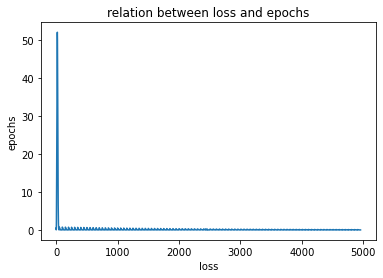

In [44]:
plt.plot(loss)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

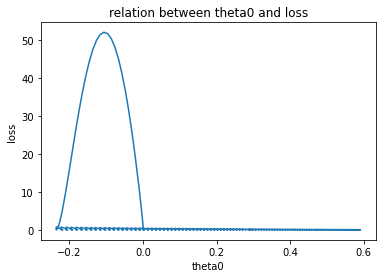

In [45]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

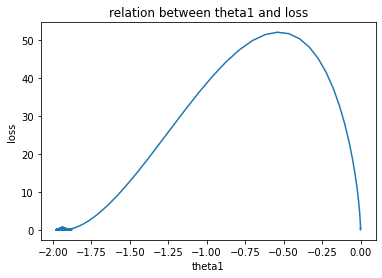

In [46]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

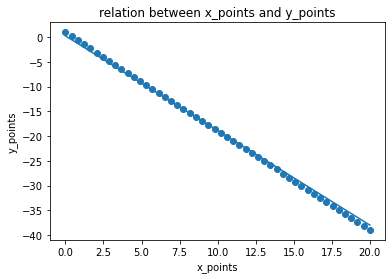

In [47]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

#### After Shuffeling x_points and y_points

In [48]:
import random
random.shuffle(x_points)
print(x_points)
print('')
a = -2
b = 1
y_points = np.add(np.multiply(a, x_points), b)
print(y_points)

[13.46938776  5.30612245  0.         15.91836735 13.87755102 19.59183673
  0.40816327 17.55102041  2.04081633  9.79591837  8.57142857 12.24489796
  3.26530612  6.12244898 12.65306122  8.16326531  4.89795918  1.2244898
  7.34693878  2.85714286  6.53061224  6.93877551  7.75510204  9.3877551
 17.14285714 14.28571429  1.63265306  2.44897959 11.83673469 17.95918367
 14.69387755 16.73469388 15.10204082 18.7755102  16.32653061  4.08163265
  8.97959184  4.48979592 10.6122449  13.06122449  5.71428571 19.18367347
 11.02040816  0.81632653 20.         11.42857143 18.36734694  3.67346939
 10.20408163 15.51020408]

[-25.93877551  -9.6122449    1.         -30.83673469 -26.75510204
 -38.18367347   0.18367347 -34.10204082  -3.08163265 -18.59183673
 -16.14285714 -23.48979592  -5.53061224 -11.24489796 -24.30612245
 -15.32653061  -8.79591837  -1.44897959 -13.69387755  -4.71428571
 -12.06122449 -12.87755102 -14.51020408 -17.7755102  -33.28571429
 -27.57142857  -2.26530612  -3.89795918 -22.67346939 -34.9183

In [49]:
m = len(x_points)
m

50

In [50]:
learning_rate = 0.001
maxNumOfIteration = 100
thetas0, thetas1, loss, hyposesis, optimum, numIter = GDStocastic(x_points, y_points, learning_rate, maxNumOfIteration)

print('thetas0: ', thetas0)
print('')
print('thetas1: ', thetas1)
print('')
print('loss: ', loss)
print('')
print('hyposesis: ', hyposesis)
print('')
print('optimum: ', optimum)

==================iteration1===================
error using MSE =  336.4100374843815
New Theta =  [-0.02593877551020408, -0.34937942523948357]

==================iteration2===================
error using MSE =  29.89543875407088
New Theta =  [-0.03367123162117825, -0.39040878419567304]

==================iteration3===================
error using MSE =  0.5342381075406217
New Theta =  [-0.03263756038955707, -0.39040878419567304]

==================iteration4===================
error using MSE =  302.31995250069195
New Theta =  [-0.0572269870807466, -0.7818323111166492]

==================iteration5===================
error using MSE =  125.5788747653283
New Theta =  [-0.07307494434755725, -1.0017631466560624]

==================iteration6===================
error using MSE =  170.83316694277673
New Theta =  [-0.09155916285647868, -1.3639029378512577]

==================iteration7===================
error using MSE =  0.34605185643295644
New Theta =  [-0.09072723514756047, -1.36356337552

==================iteration325===================
error using MSE =  0.2602111698929713
New Theta =  [-0.04866973001374861, -1.9091547463642835]

==================iteration326===================
error using MSE =  0.03103028945519025
New Theta =  [-0.04891884962138795, -1.9127135979019885]

==================iteration327===================
error using MSE =  0.41078994108740413
New Theta =  [-0.04801243918335515, -1.9112337441256084]

==================iteration328===================
error using MSE =  0.3449695185297196
New Theta =  [-0.047181813493251935, -1.9091995587620902]

==================iteration329===================
error using MSE =  0.00038085017952620533
New Theta =  [-0.04720941241277884, -1.9095262398503678]

==================iteration330===================
error using MSE =  0.1668255881826693
New Theta =  [-0.04778703787652272, -1.9198999216482173]

==================iteration331===================
error using MSE =  0.00834550673833358
New Theta =  [-0.04791623158

New Theta =  [0.02750342078629226, -1.9188468414350859]

==================iteration620===================
error using MSE =  0.011813461862232418
New Theta =  [0.0273497102670541, -1.9209799670081869]

==================iteration621===================
error using MSE =  0.16559856851371277
New Theta =  [0.026774212971641318, -1.932255016061172]

==================iteration622===================
error using MSE =  0.44705582583321
New Theta =  [0.027719787744817093, -1.9318690671741614]

==================iteration623===================
error using MSE =  0.02497325985649476
New Theta =  [0.027496300564618787, -1.9357914952347848]

==================iteration624===================
error using MSE =  0.35403245955320367
New Theta =  [0.028337766499227198, -1.9340742178172166]

==================iteration625===================
error using MSE =  0.05309193084621857
New Theta =  [0.028663625152161927, -1.9308821330537742]

==================iteration626===================
error using MSE 


==================iteration902===================
error using MSE =  0.1935902471885016
New Theta =  [0.09421525456702165, -1.933914159764918]

==================iteration903===================
error using MSE =  0.020903095815580617
New Theta =  [0.09441972019159253, -1.9317443204837577]

==================iteration904===================
error using MSE =  9.908838241826835e-05
New Theta =  [0.09443379771853573, -1.9315604507440913]

==================iteration905===================
error using MSE =  0.13234641140486128
New Theta =  [0.094948280782212, -1.928620547523084]

==================iteration906===================
error using MSE =  0.1077725687551628
New Theta =  [0.09448401239268896, -1.9375269207098527]

==================iteration907===================
error using MSE =  0.02355256324143852
New Theta =  [0.09470104954730281, -1.9351350826794143]

==================iteration908===================
error using MSE =  0.3632485544534624
New Theta =  [0.09555339754484074, -1.

New Theta =  [0.15273739923040758, -1.9425944339071566]

==================iteration1171===================
error using MSE =  0.0027413141127875487
New Theta =  [0.15281144400217153, -1.94159709616503]

==================iteration1172===================
error using MSE =  0.14434327920982354
New Theta =  [0.15334873959904502, -1.9387461399367216]

==================iteration1173===================
error using MSE =  0.35840917836926284
New Theta =  [0.15419539085944597, -1.9387461399367216]

==================iteration1174===================
error using MSE =  0.008353664925207234
New Theta =  [0.1540661340226813, -1.9408036977464453]

==================iteration1175===================
error using MSE =  0.0002985141176072831
New Theta =  [0.1540905681839154, -1.940464611427278]

==================iteration1176===================
error using MSE =  0.05135954202409117
New Theta =  [0.15377007000287815, -1.946743759463926]

==================iteration1177===================
error using

error using MSE =  0.043102089237184005
New Theta =  [0.2104500503829563, -1.930299382866063]

==================iteration1440===================
error using MSE =  0.17428922639417035
New Theta =  [0.21104045571219068, -1.928612510496822]

==================iteration1441===================
error using MSE =  0.05208556646197886
New Theta =  [0.21136321124339652, -1.9265047192726206]

==================iteration1442===================
error using MSE =  0.03882835479328656
New Theta =  [0.2116418807781264, -1.9245710939295968]

==================iteration1443===================
error using MSE =  0.020685628633809988
New Theta =  [0.21184528003394515, -1.9229937119456963]

==================iteration1444===================
error using MSE =  0.0021280339678689084
New Theta =  [0.21191051858034018, -1.9223812684489265]

==================iteration1445===================
error using MSE =  0.14716253490524367
New Theta =  [0.21136800123517002, -1.9316815657947008]

==================iter

New Theta =  [0.266972794350888, -1.9298650161758162]

==================iteration1730===================
error using MSE =  0.01788380174345061
New Theta =  [0.2671619176003496, -1.928398346077951]

==================iteration1731===================
error using MSE =  0.001839774760669826
New Theta =  [0.26722257689082796, -1.9278288915142765]

==================iteration1732===================
error using MSE =  0.12723065356586
New Theta =  [0.2667181353113247, -1.9364764614486176]

==================iteration1733===================
error using MSE =  0.015172342255719583
New Theta =  [0.2665439380538508, -1.9389649936982452]

==================iteration1734===================
error using MSE =  0.20085570230026858
New Theta =  [0.2671777451259165, -1.9379302066418114]

==================iteration1735===================
error using MSE =  0.16867279843348879
New Theta =  [0.26775855972358686, -1.936507803545476]

==================iteration1736===================
error using MSE =  

New Theta =  [0.31566110814275633, -1.9568361772498628]

==================iteration2011===================
error using MSE =  0.1291133047363417
New Theta =  [0.3161692681662457, -1.9547620547050084]

==================iteration2012===================
error using MSE =  0.0385343355179608
New Theta =  [0.3164468806137979, -1.9522692082371929]

==================iteration2013===================
error using MSE =  0.11009853456135814
New Theta =  [0.316916132219147, -1.9501623642948092]

==================iteration2014===================
error using MSE =  0.011887998520181176
New Theta =  [0.31707032689168907, -1.9485260126678319]

==================iteration2015===================
error using MSE =  5.635364726129346e-05
New Theta =  [0.317080943260867, -1.9483873498867321]

==================iteration2016===================
error using MSE =  0.07526797553173255
New Theta =  [0.31746893288838746, -1.9461702663009008]

==================iteration2017===================
error using MSE

New Theta =  [0.362616884322156, -1.9560230102299125]

==================iteration2287===================
error using MSE =  0.011664561137573927
New Theta =  [0.36276962306077576, -1.9543397669879807]

==================iteration2288===================
error using MSE =  0.17997403133924
New Theta =  [0.36336957977811335, -1.9538500064023991]

==================iteration2289===================
error using MSE =  0.04100373144210796
New Theta =  [0.36308321032638324, -1.9595773954370017]

==================iteration2290===================
error using MSE =  0.015302730625598974
New Theta =  [0.3632581544924797, -1.957578033538756]

==================iteration2291===================
error using MSE =  0.010144168045651112
New Theta =  [0.36311571736216847, -1.9601942257281462]

==================iteration2292===================
error using MSE =  0.12037312193671162
New Theta =  [0.36360637635156273, -1.9583918049507794]

==================iteration2293===================
error using MS


==================iteration2572===================
error using MSE =  0.11001117577631983
New Theta =  [0.40864246749382216, -1.948723780160198]

==================iteration2573===================
error using MSE =  0.00012145355978952188
New Theta =  [0.4086268820159797, -1.948908261326497]

==================iteration2574===================
error using MSE =  0.05320087172852628
New Theta =  [0.40830068921492935, -1.9547664177535231]

==================iteration2575===================
error using MSE =  0.0026613916865647624
New Theta =  [0.4082277318069907, -1.9558384449722137]

==================iteration2576===================
error using MSE =  0.010842435183774354
New Theta =  [0.40808047397063707, -1.958302759784662]

==================iteration2577===================
error using MSE =  0.0007141893490653938
New Theta =  [0.4080426800730062, -1.9588735247692912]

==================iteration2578===================
error using MSE =  0.016238405111189985
New Theta =  [0.40786246

New Theta =  [0.4510458432711057, -1.96500963106151]

==================iteration2879===================
error using MSE =  0.0002490281026580279
New Theta =  [0.4510235260982266, -1.9653739930676994]

==================iteration2880===================
error using MSE =  0.08308756272860682
New Theta =  [0.4514311719315884, -1.9637101325233657]

==================iteration2881===================
error using MSE =  0.024797785372249494
New Theta =  [0.4516538725619074, -1.9617103717613171]

==================iteration2882===================
error using MSE =  0.07085109404778132
New Theta =  [0.4520303060727637, -1.960020262120738]

==================iteration2883===================
error using MSE =  0.007650217185441339
New Theta =  [0.45215400099736, -1.9587075812882877]

==================iteration2884===================
error using MSE =  3.6264947375959213e-05
New Theta =  [0.4521625174458423, -1.9585963460428044]

==================iteration2885===================
error using MSE

New Theta =  [0.4914565803232565, -1.9611234284364272]

==================iteration3175===================
error using MSE =  0.0019659059962767
New Theta =  [0.4913938761607746, -1.9620447957218752]

==================iteration3176===================
error using MSE =  0.008009045962542828
New Theta =  [0.4912673135599595, -1.9641627821028629]

==================iteration3177===================
error using MSE =  0.000527554486208109
New Theta =  [0.49123483111897337, -1.964653333252449]

==================iteration3178===================
error using MSE =  0.011994919101617292
New Theta =  [0.49107994458565546, -1.967561406939234]

==================iteration3179===================
error using MSE =  0.0002140303370528462
New Theta =  [0.49105925495844505, -1.9678991967712407]

==================iteration3180===================
error using MSE =  0.07141065151241947
New Theta =  [0.4914371720168386, -1.9663566781655528]

==================iteration3181===================
error using 

==================iteration3454===================
error using MSE =  0.016292680826048817
New Theta =  [0.5256530814226564, -1.9682178430204702]

==================iteration3455===================
error using MSE =  0.020387545457756607
New Theta =  [0.5258550098528378, -1.9664870279046298]

==================iteration3456===================
error using MSE =  0.002034076005443313
New Theta =  [0.5259187919193682, -1.9657060230083394]

==================iteration3457===================
error using MSE =  0.06555852185477036
New Theta =  [0.5262808927944148, -1.9645236528041055]

==================iteration3458===================
error using MSE =  0.032900480903151695
New Theta =  [0.5265374097759312, -1.9629531406723721]

==================iteration3459===================
error using MSE =  1.1075152140025153e-05
New Theta =  [0.5265421161869077, -1.9628935901661384]

==================iteration3460===================
error using MSE =  0.014543381062801522
New Theta =  [0.5267126646

New Theta =  [0.5571558000173391, -1.9576293403342067]

==================iteration3717===================
error using MSE =  0.006527149441423902
New Theta =  [0.5572700554280768, -1.95674327796522]

==================iteration3718===================
error using MSE =  0.000671480474226607
New Theta =  [0.5573067018596692, -1.9563992502400673]

==================iteration3719===================
error using MSE =  0.04643571024645008
New Theta =  [0.5570019537333536, -1.96162350383405]

==================iteration3720===================
error using MSE =  0.005537477620954967
New Theta =  [0.5568967161201067, -1.963126898309006]

==================iteration3721===================
error using MSE =  0.0733070862574325
New Theta =  [0.557279618421634, -1.9625017516942675]

==================iteration3722===================
error using MSE =  0.061561172077634306
New Theta =  [0.557630506358382, -1.96164243429815]

==================iteration3723===================
error using MSE =  6.79


==================iteration3997===================
error using MSE =  0.08567420388174583
New Theta =  [0.586471425054601, -1.9700519231177855]

==================iteration3998===================
error using MSE =  0.001996861785790335
New Theta =  [0.586408229140401, -1.9710578988948477]

==================iteration3999===================
error using MSE =  7.135687621011527e-05
New Theta =  [0.586420175426536, -1.9708921136995043]

==================iteration4000===================
error using MSE =  0.012276995512965962
New Theta =  [0.5862634782950181, -1.9739620983169974]

==================iteration4001===================
error using MSE =  0.08124835503258059
New Theta =  [0.5866665871017505, -1.973797564110168]

==================iteration4002===================
error using MSE =  0.0010832685092855082
New Theta =  [0.5866200410276027, -1.9746144952074556]

==================iteration4003===================
error using MSE =  0.06536744714032165
New Theta =  [0.586981613833937

==================iteration4275===================
error using MSE =  0.0011282231105271049
New Theta =  [0.6147011550514925, -1.971246715911016]

==================iteration4276===================
error using MSE =  0.004596349350032973
New Theta =  [0.6146052764892376, -1.9728512142997714]

==================iteration4277===================
error using MSE =  0.00030276074467933513
New Theta =  [0.6145806691429898, -1.973222835447187]

==================iteration4278===================
error using MSE =  0.006883820978711814
New Theta =  [0.6144633335475491, -1.9754258711166859]

==================iteration4279===================
error using MSE =  0.00012283088462740772
New Theta =  [0.6144476599465188, -1.97568176664371]

==================iteration4280===================
error using MSE =  0.040982197280380404
New Theta =  [0.6147339541912406, -1.9745132187060705]

==================iteration4281===================
error using MSE =  0.012231285873212464
New Theta =  [0.6148903593

New Theta =  [0.641994215401114, -1.9693851153744335]

==================iteration4563===================
error using MSE =  0.008855156725662897
New Theta =  [0.6421272955027495, -1.9684073840154785]

==================iteration4564===================
error using MSE =  0.035807044220573
New Theta =  [0.6423949035901481, -1.9676427894800539]

==================iteration4565===================
error using MSE =  0.01070077720891205
New Theta =  [0.6425411962913256, -1.9666874085744046]

==================iteration4566===================
error using MSE =  0.007977134593224577
New Theta =  [0.6426675065014689, -1.9658109703815734]

==================iteration4567===================
error using MSE =  0.004249782012033475
New Theta =  [0.6427596995816, -1.9650960036376992]

==================iteration4568===================
error using MSE =  0.000437196308497192
New Theta =  [0.6427892697120865, -1.9648184064943557]

==================iteration4569===================
error using MSE =  

In [51]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.9992224186922867

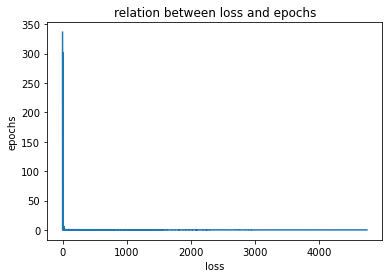

In [52]:
plt.plot(loss)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

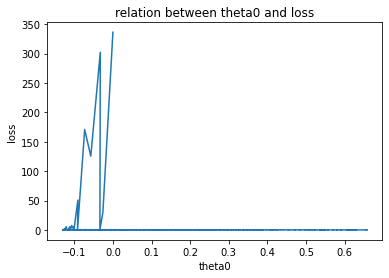

In [53]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

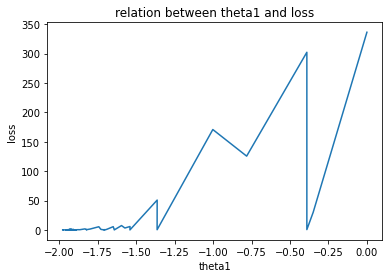

In [54]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

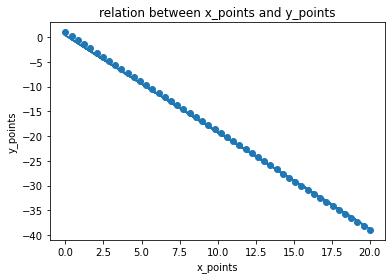

In [55]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()